In [1]:
import pandas as pd              # for reading Dataframe
import matplotlib.pyplot as plt   

In [2]:
path = "bbc-text.csv"            # Put your path of .csv file

In [3]:
data = pd.read_csv(path)         # Reading the .csv file using pandas
data_size = len(data)

In [4]:
data.head()                      # Visualize top 5 rows of our dataset

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
# Percentage of each category in our dataset
data['category'].value_counts()/ data_size * 100

sport            22.966292
business         22.921348
politics         18.741573
tech             18.022472
entertainment    17.348315
Name: category, dtype: float64

In [6]:
# Total size of dataset
print("data count :-",len(data))

data count :- 2225


In [7]:
# Lets find that if there is some duplicate rows in our dataset or not
duplicate_text_data = data[data.duplicated()]
print("duplicate data count :-",len(duplicate_text_data))

duplicate data count :- 99


In [8]:
duplicate_text_data

,category,text
85,politics,hague given up his pm ambition former conser...
301,politics,fox attacks blair s tory lies tony blair lie...
496,tech,microsoft gets the blogging bug software giant...
543,business,economy strong in election year uk businesse...
582,entertainment,ray dvd beats box office takings oscar-nominat...
...,...,...
2206,politics,kennedy questions trust of blair lib dem leade...
2207,tech,california sets fines for spyware the makers o...
2213,tech,progress on new internet domains by early 2005...
2215,tech,junk e-mails on relentless rise spam traffic i...


In [9]:
# Creating a list of index of duplicate text
index_of_duplicate_data = duplicate_text_data.index
index_of_duplicate_data[:5]

Int64Index([85, 301, 496, 543, 582], dtype='int64')

In [10]:
# Drop the duplicate rows
unique_data = data.drop(index_of_duplicate_data)
print("unique data count :-", len(unique_data))

unique data count :- 2126


In [11]:
# Category wise duplicate data
print("Duplicate Article Diff")
(data['category'].value_counts()- unique_data['category'].value_counts())

Duplicate Article Diff


business          7
entertainment    17
politics         14
sport             7
tech             54
Name: category, dtype: int64

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True,min_df = 5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(unique_data.text).toarray()  

In [13]:
# Associate Category names with numerical index and save it in new column category_id
unique_data['category_id'] = unique_data['category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
unique_data['category_id'][0:10]

0    0
1    1
2    2
3    2
4    3
5    4
6    4
7    2
8    2
9    3
Name: category_id, dtype: int64

In [14]:
unique_data.head()

,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


In [15]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = unique_data[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [16]:
category_id_df

,category,category_id
0,tech,0
1,business,1
2,sport,2
4,entertainment,3
5,politics,4


In [17]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [18]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

In [19]:
# Pick 5 random samples from the dataframe
unique_data.sample(5, random_state=0)

,category,text,category_id
664,entertainment,no uk premiere for rings musical the producers...,3
1801,business,continental may run out of cash shares in co...,1
1258,business,honda wins china copyright ruling japan s hond...,1
1881,politics,woolf murder sentence rethink plans to give mu...,4
839,tech,format wars could confuse users technology f...,0


In [20]:
labels = unique_data.category_id

In [21]:
print(f"X features : {features[0]} and y : {labels[0]}\n")
print(f"X features : {features[1]} and y : {labels[1]}\n")
print(f"X features : {features[2]} and y : {labels[2]}\n")
print(f"Shape of X: {features.shape} and shape of y : {labels.shape}")

X features : [0.         0.02429457 0.         ... 0.         0.         0.        ] and y : 0

X features : [0.         0.03235501 0.         ... 0.         0.         0.        ] and y : 1

X features : [0. 0. 0. ... 0. 0. 0.] and y : 2

Shape of X: (2126, 14220) and shape of y : (2126,)


In [22]:
# lets do a initial test to see that which model gives maximum accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initializing a list of models 

models = [
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [23]:
# Entries appends the model name and accuarcy appends model's accuracy
entries = []
accuracy = []

for model in models:
    model_name = model.__class__.__name__
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, unique_data.index, \
                                                                                     test_size=0.50, random_state=0)
    model.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    entries.append((model_name))

In [24]:
# Store the entries into the results dataframe and name its columns    
model_acc = pd.DataFrame(list(zip(entries, accuracy)), columns = ['model_name', 'accuracy'])

In [25]:
model_acc

,model_name,accuracy
0,RandomForestClassifier,0.926623
1,MultinomialNB,0.968015
2,LogisticRegression,0.972719


In [26]:
from sklearn.model_selection import train_test_split


model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, unique_data.index, \
                                                                                 test_size=0.50, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

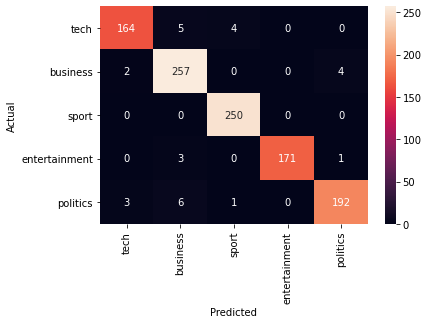

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [31]:
import pickle
filename = 'finalized_model.model'
pickle.dump(model, open(filename, 'wb'))
# Dump the file
pickle.dump(tfidf, open("tfidftransformer.tfidf", "wb"))
pickle.dump(id_to_category, open("id_dict.pickle", "wb"))